In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import rc

In [32]:
# test mean IoUs, from "2021-07-17-train_acdc_ImageNetBackbone_budget_608_lr_0.01_seed_123" \
ralis_data_imageNetBackbone = [{'128': 0.817, '960':0.841, '1424': 0.851, '1904': 0.853, '2384': 0.849, '2864': 0.841}, 
{'128': 0.778, '960':0.832, '1424': 0, '1904': 0., '2384': 0., '2864': 0.},
{'128': 0., '960':0., '1424': 0, '1904': 0., '2384': 0., '2864': 0.}
]
 
# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
df_ralis = pd.DataFrame(ralis_data_imageNetBackbone, index =['0.01', '0.03', '0.05'])

In [33]:
df_ralis

,128,960,1424,1904,2384,2864
0.01,0.817,0.841,0.851,0.853,0.849,0.841
0.03,0.778,0.832,0.000,0.000,0.000,0.000
0.05,0.000,0.000,0.000,0.000,0.000,0.000


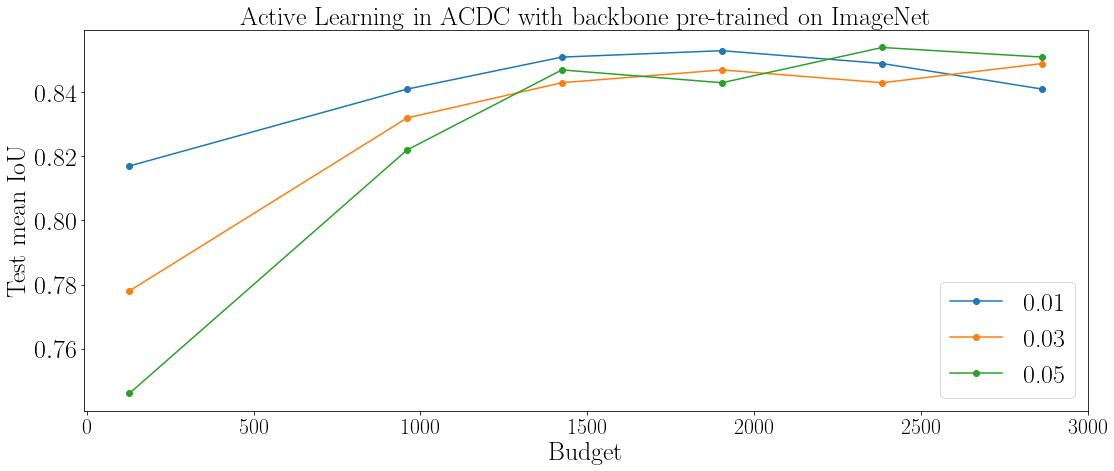

In [36]:
ralis_lr_01 = [0.817, 0.841, 0.851, 0.853, 0.849, 0.841]
ralis_lr_03 = [0.778, 0.832, 0.843, 0.847, 0.843, 0.849]
ralis_lr_05 = [0.746, 0.822, 0.847, 0.843, 0.854, 0.851]
learning_rates = [0.01, 0.03, 0.05]
budget = [128, 960, 1424, 1904, 2384, 2864]

fig, ax = plt.subplots()
plt.plot(budget, ralis_lr_01, label=learning_rates[0], marker='o')
plt.plot(budget, ralis_lr_03, label=learning_rates[1], marker='o')
plt.plot(budget, ralis_lr_05, label=learning_rates[2], marker='o')
plt.xlabel('Budget')
plt.ylabel('Test mean IoU')
plt.legend()
plt.title('Active Learning in ACDC with backbone pre-trained on ImageNet')
plt.show()

In [37]:
ralis_lr_01 = [0.730, 0.782, 0.809, 0.817, 0.841, 0.851, 0.853, 0.849]
random = [0.241, 0.241, 0.241, 0.579, 0.745, 0.778, 0.786, 0.794]
entropy = [0.241, 0.241, 0.241, 0.241, 0.797, 0.804, 0.821, 0.821]
bald = [0.241, 0.241, 0.241, 0.241, 0.666, 0.705, 0.726, 0.764]
al_algo = ["Ralis", "Random", "Entropy", "Bald", "Supervised"]
budget = [16, 32, 62, 128, 960, 1424, 1904, 2384]
values = ['0.13%', '0.27%','0.5%','1%', '8%', '12%', '16%', '20%']
supervised_allTrain50patients = 0.836

In [69]:
def rc_params():
    plt.rc('text', usetex=True)
    plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 18})
    plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})
    plt.rc('xtick', **{'labelsize': 18})
    plt.rc('ytick', **{'labelsize': 18})
    plt.rc('legend', **{'fontsize': 18})
    plt.rc('figure', **{'figsize': (15,10)})


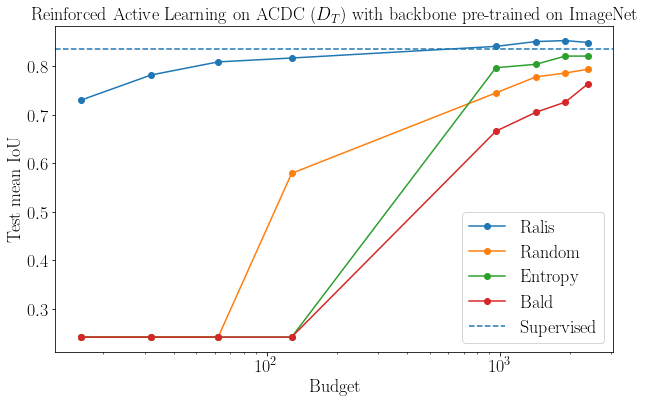

In [70]:
#fig, ax = plt.subplots()
plt.figure()
rc_params()
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (18, 7),
#           'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'x-large'}

algos = [ralis_lr_01, random, entropy, bald]
for i, algo in enumerate(algos):
    plt.plot(budget, algo, label=al_algo[i], marker='o')
plt.axhline(y=supervised_allTrain50patients, label = al_algo[4], linestyle='--')
plt.xticks(budget, values)
#plt.xticks(rotation=90)
plt.xlabel('Budget')
plt.xscale('log')
plt.ylabel('Test mean IoU')
plt.legend()
plt.title('Reinforced Active Learning on ACDC ($D_{T}$) with backbone pre-trained on ImageNet')
#pylab.rcParams.update(params)
plt.show()

In [ ]:
################# using RC parameters
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 18})
plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})

plt.tight_layout()
# define OUT_PATH, name
plt.savefig(OUT_PATH + f'{name}.pdf', bbox_inches='tight')
plt.close()